## Preparation

Importing the required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go # for data visualization
import plotly.express as px # for data visualization

The dataset has been downloaded from [Kaggle](https://www.kaggle.com/datasets/kandij/mall-customers/data).
Now, let's load the data.

In [2]:
df = pd.read_csv('C:/Users/wojci/Downloads/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


The dataset includes five variables, with each variable containing 200 assigned values. The variables within the dataset are as follows:

- **CustomerID**: This qualitative variable represents the customer's identification number, categorized on a nominal scale.
- **Genre**: This qualitative variable indicates the customer's gender, categorized on a nominal scale with two options.
- **Age**: This quantitative variable represents the customer's age, ranging from 18 to 70. It is presented on a ratio scale.
- **'Annual Income (k$)**: This quantitative variable represents the client's annual income in thousands of dollars. It is presented on a ratio scale.
- **Spending Score (1-100)**: This quantitative variable represents the customer's spending score, ranging from 1 to 100. It is presented on a ratio scale.

The dataset was thoroughly reviewed and no deficiencies or obvious errors were found in the data structure.

## Explanatory Data Analysis

Let's remove the CustomerID variable from the dataset as it does not contribute any meaningful information and is only used for sorting purposes.

In [3]:
df = df.drop(["CustomerID"],axis = 1)

Let's update the column names to make them more practical and user-friendly.

In [4]:
df.columns = ["Gender","Age","Annual_Income","Spending_Score"]
df

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Let's check the size of the dataframe

In [5]:
df.shape

(200, 4)

Let's provide an overview of the data

In [6]:
df.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Let's examine the null data.

In [7]:
df.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

Let's assess the distribution of the "Age", "Annual_Income", and "Spending_Score" variables through visualizations.

D:\programfiles\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':' Age'}, xlabel='Age', ylabel='count'>

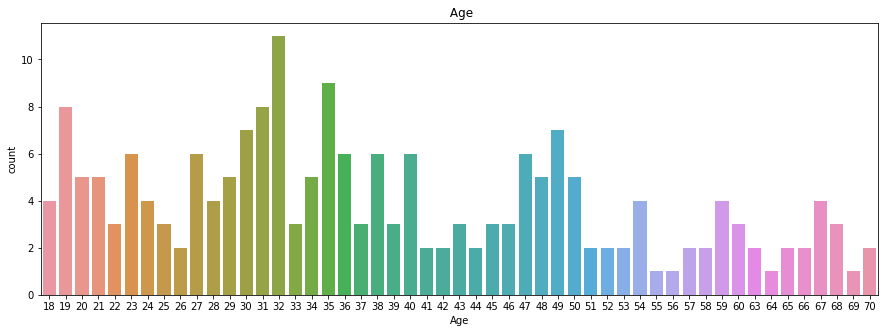

In [8]:
plt.figure(figsize=(15,5))
plt.title(" Age")
sns.countplot('Age',data=df)

<AxesSubplot:title={'center':'Annual Income'}, xlabel='Annual_Income', ylabel='count'>

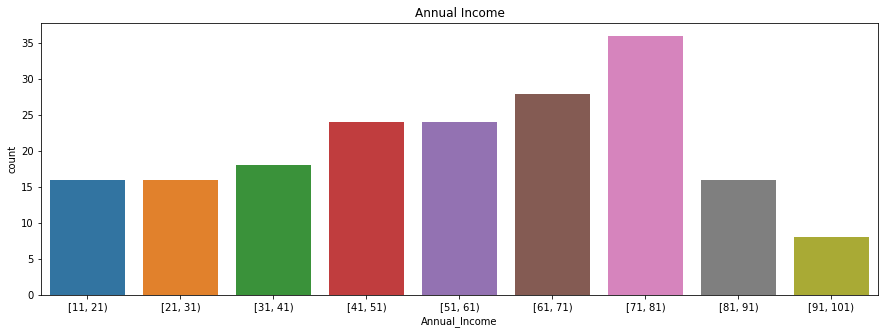

In [9]:
bins = [11, 21, 31, 41, 51, 61, 71, 81, 91, 101]
plt.figure(figsize=(15,5))
plt.title("Annual Income")
sns.countplot(x=pd.cut(df['Annual_Income'], bins=bins, right=False), data=df)

<AxesSubplot:title={'center':' Spending Score'}, xlabel='Spending_Score', ylabel='count'>

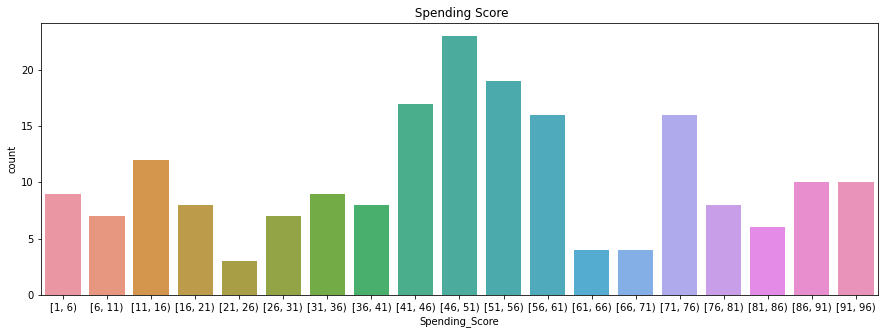

In [10]:
bins = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96]
plt.figure(figsize=(15,5))
plt.title(" Spending Score")
sns.countplot(x=pd.cut(df['Spending_Score'], bins=bins, right=False), data=df)

Visualization of correlation results using the seaborn library heatmap.

<AxesSubplot:>

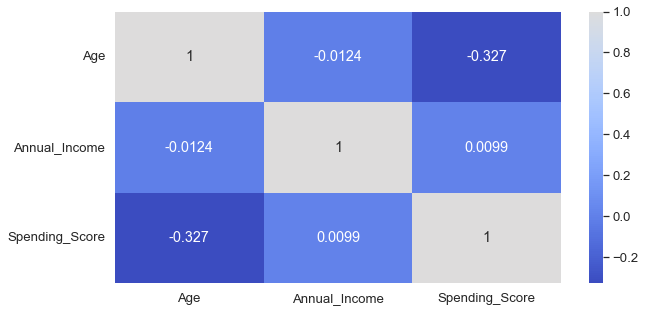

In [11]:
plt.figure(figsize = (10,5))
sns.set(font_scale = 1.2)
sns.heatmap(data = df.corr(),
            annot = True,
            fmt = '.3g',
            cmap = 'coolwarm',
            center = True)

Let's use the pairplot function from the seaborn library to visualize the correlation results.

<Figure size 720x360 with 0 Axes>

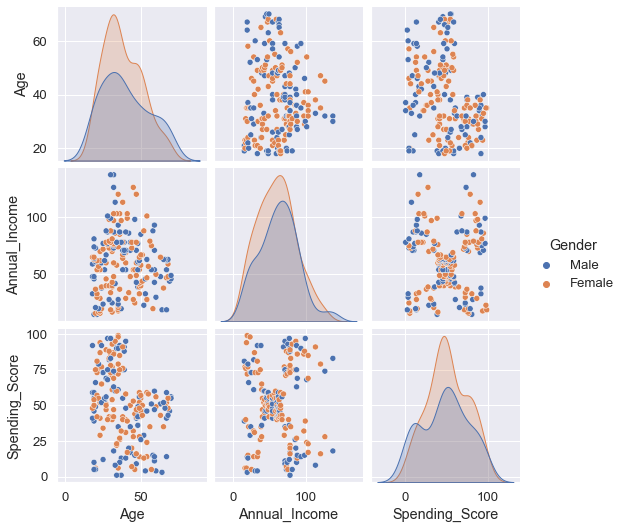

In [12]:
plt.figure(figsize = (10,5))
sns.set(font_scale = 1.2)
sns.pairplot(df, hue = "Gender")

Let's remove the variable "Gender" as its inclusion does not contribute any new insights for clustering the data.

In [13]:
df = df.drop(["Gender"],axis = 1)

# Clustering Models

In this chapter, the initial step involves preparing the dataset for model application, utilizing the 3D visualization capabilities offered by the Plotly library. Firstly, I will visualize the data that has not yet been subjected to the model using the 3D plotly feature. Subsequently, I will visualize the dataset on which the model is applied.

In [14]:
trace1= go.Scatter3d(
        x=df.Annual_Income,
        y=df.Spending_Score,
        z=df.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(255,0,0)",                                   # set color to an array/list of desired values  
        )
)

df_plot=[trace1]

layout = go.Layout(
            margin=dict(
                    l=0,
                    r=0,
                    b=0,
                    t=0
            ),
    scene = dict(
    xaxis = dict(
        title='Annual_Income'),
    yaxis = dict(
        title='Spending_Score'),
    zaxis = dict(
        title='Age'),),
    
)

fig=go.Figure(data = df_plot, layout = layout)

fig.update_traces(marker = dict(size = 10, line = dict(width = 1, color = "#FFFFFF")))
fig.update_coloraxes(showscale = False)
fig.update_layout(title = dict(text="Generated a graphical representation of data through a 3D plot."), template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#97FFFF"))
iplot(fig)

## K-Means Clustering

The K-means algorithm is an iterative algorithm that aims to divide a dataset into K pre-defined distinct and non-overlapping subgroups (clusters), where each data point is assigned to only one group. The visual representation below illustrates the implementation of the K-means model.

![K-Means](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*JsfEdbXKwJw_Euprvx17KA.png)

## What Is the Elbow Method in K-Means Clustering?

The elbow method is a graphical representation of finding the optimal ‘K’ in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square) i.e. the sum of the square distance between points in a cluster and the cluster centroid.

Let’s go through the steps involved in K-means clustering for a better understanding:

    - Select the number of clusters for the dataset (K)
    - Select the K number of centroids randomly from the dataset.
    - Now we will use Euclidean distance or Manhattan distance as the metric to calculate the distance of the points from the nearest centroid and assign the points to that nearest cluster centroid, thus creating K clusters.
    - Now we find the new centroid of the clusters thus formed.
    - Again reassign the whole data point based on this new centroid, then repeat step 4. We will continue this for a given number of iterations until the position of the centroid doesn’t change, i.e., there is no more convergence.
Finding the optimal number of clusters is an important part of this algorithm. A commonly used method for finding the optimum K-value is Elbow Method.  

## K-Means Clustering Using the Elbow Method

In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters.

In [15]:
X_data = df.iloc[:,:] #you may go with "df.iloc[:,1:]"" if you would not like to delete the variable "Gender"
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(X_data)
    wcss.append(km.inertia_)

D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

D:\programfiles\lib\site-packages\sklearn\clus

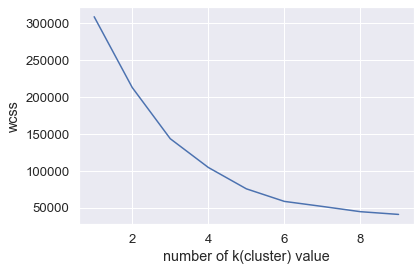

In [16]:
plt.plot(range(1,10), wcss)
plt.xlabel("number of k(cluster) value")
plt.ylabel("wcss")
plt.show()

The elbow shape occurs at point 5, indicating that our K value or ideal number of clusters is 5. However, there is potential benefit in exploring the use of a 6th iteration. Now, we will proceed to train the model on the input data with 6 clusters.

In [17]:
for clusters in range (2, 7):    
    kms = KMeans(n_clusters = clusters, init = "k-means++")
    kcluster = pd.DataFrame(kms.fit_predict(df), columns = ["kcluster"])
    df["cluster"] = kcluster

    fig = px.scatter_3d(df, x = "Spending_Score", y = "Annual_Income", z = "Age",
                        hover_data = ["Age"], color = "cluster", opacity = 0.8,
                        title = f"K-Means Clustering Mall Customers 💵 (Clusters = {clusters})  Spending_Score,  Annual_Income,  Age",
                        color_continuous_scale = ["#FF0000", "#0000FF", "#FFFF00", 
                                                  "#00EFFF", "#FF00FF", "#FFFFFF"])

    fig.update_traces(marker = dict(size = 6, line = dict(width = 1, color = "#FFFFFF")))
    fig.update_coloraxes(showscale = False)
    fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#97FFFF"))
    fig.show()

D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

D:\programfiles\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



## Hierarchical Clustering

Hierarchical clustering, also referred to as hierarchical cluster analysis, is an algorithm used to group similar objects into clusters. The outcome is a collection of distinct clusters, with objects within each cluster sharing broad similarities.

I generate visualizations of the X_hierarchical using the Plotly library, including the creation of dendrograms. Dendrograms are utilized in Hierarchical Clustering as they effectively illustrate the hierarchical relationship between the respective clusters.

In [18]:
X_hierarchical = df.iloc[:,:]  #you may go with "df.iloc[:,1:]"" if you would not like to delete the variable "Gender"

import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage

merg = linkage(X_hierarchical, method="ward")

fig = ff.create_dendrogram(merg)
fig.update_layout(width=1000, height=800)
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#97FFFF"))
fig.show()

Let's divide the dataset into 6 clusters and incorporate the prediction of X_hierarchical into the existing code below.

In [19]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(X_hierarchical)

X_hierarchical["cluster"] = cluster

cluster

D:\programfiles\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [20]:
X_hierarchical

,Age,Annual_Income,Spending_Score,cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,0
197,32,126,74,2
198,32,137,18,0


Let's separate six classes for visualization.

In [21]:
hierarchical0 = X_hierarchical[X_hierarchical['cluster']==0]
hierarchical1 = X_hierarchical[X_hierarchical['cluster']==1]
hierarchical2 = X_hierarchical[X_hierarchical['cluster']==2]
hierarchical3 = X_hierarchical[X_hierarchical['cluster']==3]
hierarchical4 = X_hierarchical[X_hierarchical['cluster']==4]
hierarchical5 = X_hierarchical[X_hierarchical['cluster']==5]

Let us proceed with visualizing the dataset by using the 3D plotly to apply the model.

In [22]:
trace0= go.Scatter3d(
        x=hierarchical0.Annual_Income,
        y=hierarchical0.Spending_Score,
        z=hierarchical0.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(255,0,0)",                                   # set color to an array/list of desired values  
        )
)
trace1= go.Scatter3d(
        x=hierarchical1.Annual_Income,
        y=hierarchical1.Spending_Score,
        z=hierarchical1.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(0,255,0)",                                   # set color to an array/list of desired values  
        )
)
trace2= go.Scatter3d(
        x=hierarchical2.Annual_Income,
        y=hierarchical2.Spending_Score,
        z=hierarchical2.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(0,0,255)",                                   # set color to an array/list of desired values  
        )
)
trace3= go.Scatter3d(
        x=hierarchical3.Annual_Income,
        y=hierarchical3.Spending_Score,
        z=hierarchical3.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(255,255,0)",                                   # set color to an array/list of desired values  
        )
)
trace4= go.Scatter3d(
        x=hierarchical4.Annual_Income,
        y=hierarchical4.Spending_Score,
        z=hierarchical4.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(127,0,255)",                                   # set color to an array/list of desired values  
        )
)

trace5= go.Scatter3d(
        x=hierarchical5.Annual_Income,
        y=hierarchical5.Spending_Score,
        z=hierarchical5.Age,
        mode="markers",
        marker=dict(
                    size=10,
                    color="rgb(127,127,0)",                                   # set color to an array/list of desired values  
        )
)


df_plot_hierarchical=[trace0,trace1,trace2,trace3,trace4, trace5]

layout = go.Layout(
            margin=dict(
                    l=0,
                    r=0,
                    b=0,
                    t=0
            ),
    scene = dict(
    xaxis = dict(
        title='Annual_Income'),
    yaxis = dict(
        title='Spending_Score'),
    zaxis = dict(
        title='Age'),),
    
)

fig=go.Figure(data = df_plot_hierarchical, layout = layout)
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12, color = "#97FFFF"))
iplot(fig)